In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anfiniti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data PreProcessing

In [2]:
import pandas as pd

# df = pd.read_csv('sample_data/the_data_selected.csv', sep=';', encoding='ISO-8859-1')
df = pd.read_csv('sample_data/the_data_selected.csv', sep=',')
my_df = df[['score', 'content']]
my_df.head()

,score,content
0,5,Lokasi strategis d tengah kota. Dosennya oke. ...
1,5,Salah satu universitas swasta dengan lokasi pa...
2,5,Salah satu kampus terbaik dan legend di Kota S...
3,5,Kampus ini memiliki fasilitas yang lengkap dan...
4,5,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu..."


### Menghitung Jumlah Baris

In [3]:
len(my_df.index)

291

### Menghapus Baris yang Null

In [4]:
my_df = my_df.dropna(subset=['content'])
my_df.isnull().sum()

score      0
content    0
dtype: int64

### Menghitung Jumlah Baris setelah Null Dihilangkan

In [5]:
len(my_df)

141

## a. Casefolding

Proses casefolding adalah proses mengubah seluruh huruf menjadi kecil.

In [6]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [7]:
my_df['text_clean'] = my_df['content'].str.lower()

In [8]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,score,content,text_clean
0,5,Lokasi strategis d tengah kota. Dosennya oke. ...,lokasi strategis d tengah kota dosennya oke s...
1,5,Salah satu universitas swasta dengan lokasi pa...,salah satu universitas swasta dengan lokasi pa...
2,5,Salah satu kampus terbaik dan legend di Kota S...,salah satu kampus terbaik dan legend di kota s...
3,5,Kampus ini memiliki fasilitas yang lengkap dan...,kampus ini memiliki fasilitas yang lengkap dan...
4,5,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu...",angkatan 2017 kelas reguler sore jurusan ilmu ...


## b. Filtering

Filtering Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Stopword biasanya dihilangkan dalam proses pengolahan teks. contoh dalam bahasa Indonesia seperti "dan", "atau", "yang", "di", "dari", "ke", "dengan", "jika", "ketika", "saat", "atau", "tetapi", "karena", "sehingga", "sebelum", "setelah", "agar", "supaya", "serta", "itulah", "yaitu", "misalnya", "contoh", "adalah", "yakni", "dst". Stopword mempunya informasi rencahan yang kecil, sehingga tidak berpengaruh dalam proses klasifikasi.

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,score,content,text_clean,text_Stopword
0,5,Lokasi strategis d tengah kota. Dosennya oke. ...,lokasi strategis d tengah kota dosennya oke s...,lokasi strategis d kota dosennya oke semoga ma...
1,5,Salah satu universitas swasta dengan lokasi pa...,salah satu universitas swasta dengan lokasi pa...,salah universitas swasta lokasi strategis jant...
2,5,Salah satu kampus terbaik dan legend di Kota S...,salah satu kampus terbaik dan legend di kota s...,salah kampus terbaik legend kota semarang s1 s2
3,5,Kampus ini memiliki fasilitas yang lengkap dan...,kampus ini memiliki fasilitas yang lengkap dan...,kampus memiliki fasilitas lengkap modern perpu...
4,5,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu...",angkatan 2017 kelas reguler sore jurusan ilmu ...,angkatan 2017 kelas reguler sore jurusan ilmu ...


## c. Tokenizing

Tokenizing merupakan proses pemisahan text menjadi potongan-potongan yang lebih kecil. Tokenizing dapat dilakukan dengan menggunakan library NLTK.

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


,score,content,text_clean,text_Stopword,text_tokens
0,5,Lokasi strategis d tengah kota. Dosennya oke. ...,lokasi strategis d tengah kota dosennya oke s...,lokasi strategis d kota dosennya oke semoga ma...,"[lokasi, strategis, d, kota, dosennya, oke, se..."
1,5,Salah satu universitas swasta dengan lokasi pa...,salah satu universitas swasta dengan lokasi pa...,salah universitas swasta lokasi strategis jant...,"[salah, universitas, swasta, lokasi, strategis..."
2,5,Salah satu kampus terbaik dan legend di Kota S...,salah satu kampus terbaik dan legend di kota s...,salah kampus terbaik legend kota semarang s1 s2,"[salah, kampus, terbaik, legend, kota, semaran..."
3,5,Kampus ini memiliki fasilitas yang lengkap dan...,kampus ini memiliki fasilitas yang lengkap dan...,kampus memiliki fasilitas lengkap modern perpu...,"[kampus, memiliki, fasilitas, lengkap, modern,..."
4,5,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu...",angkatan 2017 kelas reguler sore jurusan ilmu ...,angkatan 2017 kelas reguler sore jurusan ilmu ...,"[angkatan, 2017, kelas, reguler, sore, jurusan..."


## d. Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari kata ke bentuk dasarnya. Stemming dilakukan dengan menghilangkan imbuhan-imbuhan yang terdapat pada kata. Contoh stemming adalah mengubah kata "membaca" menjadi "baca".

In [11]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


491
------------------------
1 : lokasi : lokasi
2 : strategis : strategis
3 : d : d
4 : kota : kota
5 : dosennya : dosen
6 : oke : oke
7 : semoga : moga
8 : maju : maju
9 : foto : foto
10 : diambil : ambil
11 : dr : dr
12 : lantai : lantai
13 : 6 : 6
14 : kampus : kampus
15 : salah : salah
16 : universitas : universitas
17 : swasta : swasta
18 : jantung : jantung
19 : semarang : semarang
20 : mugas : mugas
21 : memiliki : milik
22 : fakultas : fakultas
23 : program : program
24 : studi : studi
25 : pilihan : pilih
26 : ekonomi : ekonomi
27 : bisnis : bisnis
28 : hukum : hukum
29 : ti : ti
30 : bahasa : bahasa
31 : terbaik : baik
32 : legend : legend
33 : s1 : s1
34 : s2 : s2
35 : fasilitas : fasilitas
36 : lengkap : lengkap
37 : modern : modern
38 : perpustakaan : pustaka
39 : luas : luas
40 : ruang : ruang
41 : kelas : kelas
42 : nyamanlingkungan : nyamanlingkungan
43 : hijau : hijau
44 : asri : asri
45 : suasana : suasana
46 : nyaman : nyaman
47 : angkatan : angkat
48 : 2017 : 2017


,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
0,5,Lokasi strategis d tengah kota. Dosennya oke. ...,lokasi strategis d tengah kota dosennya oke s...,lokasi strategis d kota dosennya oke semoga ma...,"[lokasi, strategis, d, kota, dosennya, oke, se...",lokasi strategis d kota dosen oke moga maju fo...
1,5,Salah satu universitas swasta dengan lokasi pa...,salah satu universitas swasta dengan lokasi pa...,salah universitas swasta lokasi strategis jant...,"[salah, universitas, swasta, lokasi, strategis...",salah universitas swasta lokasi strategis jant...
2,5,Salah satu kampus terbaik dan legend di Kota S...,salah satu kampus terbaik dan legend di kota s...,salah kampus terbaik legend kota semarang s1 s2,"[salah, kampus, terbaik, legend, kota, semaran...",salah kampus baik legend kota semarang s1 s2
3,5,Kampus ini memiliki fasilitas yang lengkap dan...,kampus ini memiliki fasilitas yang lengkap dan...,kampus memiliki fasilitas lengkap modern perpu...,"[kampus, memiliki, fasilitas, lengkap, modern,...",kampus milik fasilitas lengkap modern pustaka ...
4,5,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu...",angkatan 2017 kelas reguler sore jurusan ilmu ...,angkatan 2017 kelas reguler sore jurusan ilmu ...,"[angkatan, 2017, kelas, reguler, sore, jurusan...",angkat 2017 kelas reguler sore jurus ilmu huku...
5,5,Pemandangan malam hari dari kampus UNISBANK,pemandangan malam hari dari kampus unisbank,pemandangan malam kampus unisbank,"[pemandangan, malam, kampus, unisbank]",pandang malam kampus unisbank
6,5,Di lantai 7 terdapat ruang seminar yang cukup ...,di lantai 7 terdapat ruang seminar yang cukup ...,lantai 7 ruang seminar 5060 orang dalamnya rua...,"[lantai, 7, ruang, seminar, 5060, orang, dalam...",lantai 7 ruang seminar 5060 orang dalam ruang ...
7,5,terimakasih kampus tercinta berkat ilmu nya da...,terimakasih kampus tercinta berkat ilmu nya da...,terimakasih kampus tercinta berkat ilmu nya ba...,"[terimakasih, kampus, tercinta, berkat, ilmu, ...",terimakasih kampus cinta berkat ilmu nya bantu...
8,5,"tempat bagus, luas ,bersih dan asri banget ban...",tempat bagus luas bersih dan asri banget banya...,bagus luas bersih asri banget tumbuhan tanaman...,"[bagus, luas, bersih, asri, banget, tumbuhan, ...",bagus luas bersih asri banget tumbuh tanam sem...
9,5,kampus oke\r\ntermasuk kampus lama eksis di Ko...,kampus oketermasuk kampus lama eksis di kota s...,kampus oketermasuk kampus eksis kota semarangs...,"[kampus, oketermasuk, kampus, eksis, kota, sem...",kampus oketermasuk kampus eks kota semarangsaa...


In [14]:
data_clean.to_csv('sample_data/the_data_hasiltextpreprocessing.csv', index=False)

# Data Labelling

In [15]:
def pelabelan(skor):
    if skor < 3:
        return 'negatif'
    elif skor == 4:
        return 'positif'
    elif skor == 5:
        return 'positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df = my_df.dropna()

my_df.to_csv('sample_data/the_data_hasillabeling.csv', index=False)

my_df.head()

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,5,Lokasi strategis d tengah kota. Dosennya oke. ...,lokasi strategis d tengah kota dosennya oke s...,lokasi strategis d kota dosennya oke semoga ma...,"[lokasi, strategis, d, kota, dosennya, oke, se...",lokasi strategis d kota dosen oke moga maju fo...,positif
1,5,Salah satu universitas swasta dengan lokasi pa...,salah satu universitas swasta dengan lokasi pa...,salah universitas swasta lokasi strategis jant...,"[salah, universitas, swasta, lokasi, strategis...",salah universitas swasta lokasi strategis jant...,positif
2,5,Salah satu kampus terbaik dan legend di Kota S...,salah satu kampus terbaik dan legend di kota s...,salah kampus terbaik legend kota semarang s1 s2,"[salah, kampus, terbaik, legend, kota, semaran...",salah kampus baik legend kota semarang s1 s2,positif
3,5,Kampus ini memiliki fasilitas yang lengkap dan...,kampus ini memiliki fasilitas yang lengkap dan...,kampus memiliki fasilitas lengkap modern perpu...,"[kampus, memiliki, fasilitas, lengkap, modern,...",kampus milik fasilitas lengkap modern pustaka ...,positif
4,5,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu...",angkatan 2017 kelas reguler sore jurusan ilmu ...,angkatan 2017 kelas reguler sore jurusan ilmu ...,"[angkatan, 2017, kelas, reguler, sore, jurusan...",angkat 2017 kelas reguler sore jurus ilmu huku...,positif


### Menampilkan isi Data Hasil Labelling

In [16]:
import pandas as pd
hasillabeling = pd.read_csv('sample_data/the_data_hasillabeling.csv')
pd.set_option('display.max_colwidth', None)
hasillabeling[['content', 'text_clean', 'text_Stopword', 'text_tokens', 'text_tokens_stemmed', 'Label']].head(6)

,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,lokasi strategis d tengah kota dosennya oke semoga semakin maju foto diambil dr lantai 6 kampus,lokasi strategis d kota dosennya oke semoga maju foto diambil dr lantai 6 kampus,"['lokasi', 'strategis', 'd', 'kota', 'dosennya', 'oke', 'semoga', 'maju', 'foto', 'diambil', 'dr', 'lantai', '6', 'kampus']",lokasi strategis d kota dosen oke moga maju foto ambil dr lantai 6 kampus,positif
1,"Salah satu universitas swasta dengan lokasi paling strategis di jantung kota Semarang (Kampus Mugas). Memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis, fakultas hukum, fakultas TI, fakultas bahasa …",salah satu universitas swasta dengan lokasi paling strategis di jantung kota semarang kampus mugas memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis fakultas hukum fakultas ti fakultas bahasa,salah universitas swasta lokasi strategis jantung kota semarang kampus mugas memiliki fakultas program studi pilihan fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,"['salah', 'universitas', 'swasta', 'lokasi', 'strategis', 'jantung', 'kota', 'semarang', 'kampus', 'mugas', 'memiliki', 'fakultas', 'program', 'studi', 'pilihan', 'fakultas', 'ekonomi', 'bisnis', 'fakultas', 'hukum', 'fakultas', 'ti', 'fakultas', 'bahasa']",salah universitas swasta lokasi strategis jantung kota semarang kampus mugas milik fakultas program studi pilih fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,positif
2,"Salah satu kampus terbaik dan legend di Kota Semarang, S1 maupun S2",salah satu kampus terbaik dan legend di kota semarang s1 maupun s2,salah kampus terbaik legend kota semarang s1 s2,"['salah', 'kampus', 'terbaik', 'legend', 'kota', 'semarang', 's1', 's2']",salah kampus baik legend kota semarang s1 s2,positif
3,"Kampus ini memiliki fasilitas yang lengkap dan modern, seperti perpustakaan yang luas, dan ruang kelas yang nyaman\r\nLingkungan kampus sangat hijau dan asri, memberikan suasana yang nyaman untuk …",kampus ini memiliki fasilitas yang lengkap dan modern seperti perpustakaan yang luas dan ruang kelas yang nyamanlingkungan kampus sangat hijau dan asri memberikan suasana yang nyaman untuk,kampus memiliki fasilitas lengkap modern perpustakaan luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,"['kampus', 'memiliki', 'fasilitas', 'lengkap', 'modern', 'perpustakaan', 'luas', 'ruang', 'kelas', 'nyamanlingkungan', 'kampus', 'hijau', 'asri', 'suasana', 'nyaman']",kampus milik fasilitas lengkap modern pustaka luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,positif
4,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu Hukum\r\nKuliahnya menyenangkan ,ngasih nilainya gampang 🫶🏻🫶🏻🫶🏻 …",angkatan 2017 kelas reguler sore jurusan ilmu hukumkuliahnya menyenangkan ngasih nilainya gampang,angkatan 2017 kelas reguler sore jurusan ilmu hukumkuliahnya menyenangkan ngasih nilainya gampang,"['angkatan', '2017', 'kelas', 'reguler', 'sore', 'jurusan', 'ilmu', 'hukumkuliahnya', 'menyenangkan', 'ngasih', 'nilainya', 'gampang']",angkat 2017 kelas reguler sore jurus ilmu hukumkuliahnya senang ngasih nilai gampang,positif
5,Pemandangan malam hari dari kampus UNISBANK,pemandangan malam hari dari kampus unisbank,pemandangan malam kampus unisbank,"['pemandangan', 'malam', 'kampus', 'unisbank']",pandang malam kampus unisbank,positif


### Jumlah Label Aktual

In [17]:
len(hasillabeling)

130

### Jumlah Label Mentah Positif dan Presentase

In [18]:
positive_count = hasillabeling[hasillabeling['Label'] == 'positif'].shape[0]
print(positive_count)

113


In [19]:
total_count = len(hasillabeling)
positive_percentage = (positive_count / total_count) * 100
print(f"Percentage of positive reviews: {positive_percentage:.2f}%")

Percentage of positive reviews: 86.92%


### Jumlah Label Mentah Negatif dan Presentase

In [20]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
print(negative_count)

17


In [21]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
negative_percentage = (negative_count / total_count) * 100
print(f"Percentage of negative reviews: {negative_percentage:.2f}%")

Percentage of negative reviews: 13.08%


# Data Extracting

In [3]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Drop Kolom yang Tidak Digunakan

In [4]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

### Menampilkan Jumlah Data Hasil Extracting

In [6]:
print(A.shape)
print(A_tfid.shape)
print(A_fit_tfid.shape)

(1276,)
(1276, 2724)
(1276, 2724)


### Konversi Data Hasil Extracting ke Array

In [8]:
A_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
print(A_tfid)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12069 stored elements and shape (1276, 2724)>
  Coords	Values
  (0, 302)	1.0
  (1, 37)	0.24261165296555423
  (1, 200)	0.24261165296555423
  (1, 205)	0.10396586381954517
  (1, 248)	0.24261165296555423
  (1, 258)	0.13857321437871012
  (1, 294)	0.32923782638467314
  (1, 302)	0.24255976920997063
  (1, 395)	0.14282170096273653
  (1, 806)	0.12651082159614657
  (1, 866)	0.21280883988261554
  (1, 970)	0.2172758287116796
  (1, 1067)	0.2758322224929482
  (1, 1146)	0.20186491256043285
  (1, 1226)	0.15677499700723008
  (1, 1401)	0.2068787403092992
  (1, 1588)	0.11504751399583389
  (1, 1774)	0.1048952270101535
  (1, 1910)	0.21280883988261554
  (1, 1968)	0.1936907854296456
  (1, 2183)	0.12143161593827029
  (1, 2388)	0.20186491256043285
  (1, 2425)	0.18433378253269783
  (1, 2524)	0.24261165296555423
  (1, 2599)	0.21888210779311276
  :	:
  (1273, 2454)	0.19190099352875076
  (1273, 2661)	0.2480773746663022
  (1273, 2682)	0.24850628404327013


# Penerapan Algoritma

## a. Naive Bayes

### 1. Cara Konvensional

In [10]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [28]:
B_pred = nb.predict(A_tfid)
data_clean['Label NB'] = B_pred
data_clean = pd.DataFrame(data_clean)
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NB.csv', index=False)

data_clean.head()

,content,text_tokens_stemmed,Label,Label NB
0,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,lokasi strategis d kota dosen oke moga maju foto ambil dr lantai 6 kampus,positif,positif
1,"Salah satu universitas swasta dengan lokasi paling strategis di jantung kota Semarang (Kampus Mugas). Memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis, fakultas hukum, fakultas TI, fakultas bahasa …",salah universitas swasta lokasi strategis jantung kota semarang kampus mugas milik fakultas program studi pilih fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,positif,positif
2,"Salah satu kampus terbaik dan legend di Kota Semarang, S1 maupun S2",salah kampus baik legend kota semarang s1 s2,positif,positif
3,"Kampus ini memiliki fasilitas yang lengkap dan modern, seperti perpustakaan yang luas, dan ruang kelas yang nyaman\r\nLingkungan kampus sangat hijau dan asri, memberikan suasana yang nyaman untuk …",kampus milik fasilitas lengkap modern pustaka luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,positif,positif
4,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu Hukum\r\nKuliahnya menyenangkan ,ngasih nilainya gampang 🫶🏻🫶🏻🫶🏻 …",angkat 2017 kelas reguler sore jurus ilmu hukumkuliahnya senang ngasih nilai gampang,positif,positif


### 2. Cara Pakai 5K-Fold Cross Validation

In [29]:

from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Inisialisasi model MultinomialNB
model = MultinomialNB()

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B.iloc[train_index], B.iloc[test_index]


    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label NB Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_NB_average.csv', index=False)


Fold Accuracies: [0.8076923076923077, 0.8846153846153846, 0.8846153846153846, 0.8461538461538461, 0.9230769230769231]
Mean Accuracy: 0.8692307692307691
Standard Deviation of Accuracy: 0.03922322702763681
Overall Accuracy with Average Predictions: 0.8692307692307693


## b. Support Vector Machine (SVM)

### 1. Cara Konvensional

In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

Accuracy for C=0.01: 0.8692307692307693
Accuracy for C=0.05: 0.8692307692307693
Accuracy for C=0.25: 0.9384615384615385
Accuracy for C=0.5: 0.9923076923076923
Accuracy for C=0.75: 0.9923076923076923
Accuracy for C=1: 0.9923076923076923


LinearSVC(C=1)

In [31]:
B_pred = svm.predict(A_tfid)
data_clean['Label SVM'] = B_pred
data_clean.to_csv('sample_data/the_data_hasil_sentimen_SVM.csv', index=False)
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM
0,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,lokasi strategis d kota dosen oke moga maju foto ambil dr lantai 6 kampus,positif,positif,positif,positif
1,"Salah satu universitas swasta dengan lokasi paling strategis di jantung kota Semarang (Kampus Mugas). Memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis, fakultas hukum, fakultas TI, fakultas bahasa …",salah universitas swasta lokasi strategis jantung kota semarang kampus mugas milik fakultas program studi pilih fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,positif,positif,positif,positif
2,"Salah satu kampus terbaik dan legend di Kota Semarang, S1 maupun S2",salah kampus baik legend kota semarang s1 s2,positif,positif,positif,positif
3,"Kampus ini memiliki fasilitas yang lengkap dan modern, seperti perpustakaan yang luas, dan ruang kelas yang nyaman\r\nLingkungan kampus sangat hijau dan asri, memberikan suasana yang nyaman untuk …",kampus milik fasilitas lengkap modern pustaka luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,positif,positif,positif,positif
4,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu Hukum\r\nKuliahnya menyenangkan ,ngasih nilainya gampang 🫶🏻🫶🏻🫶🏻 …",angkat 2017 kelas reguler sore jurus ilmu hukumkuliahnya senang ngasih nilai gampang,positif,positif,positif,positif


### 2. Cara Pakai 5K-Fold Cross Validation

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42, C = 1.0)

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label SVM Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_SVM_average.csv', index=False)


Fold Accuracies: [0.8076923076923077, 0.8846153846153846, 0.8846153846153846, 0.8461538461538461, 0.9230769230769231]
Mean Accuracy: 0.8692307692307691
Standard Deviation of Accuracy: 0.03922322702763681
Overall Accuracy with Average Predictions: 0.8692307692307693


In [33]:
data_clean.to_csv('sample_data/the_data_hasil_NB_dan_SVM.csv', index=False)

## C. Neural Network

In [11]:
import numpy as np

# Convert B to 0 for 'negatif' and 1 for 'positif'
B = B.apply(lambda x: 0 if x == 'negatif' else 1)

# Convert B to a 2-dimensional array
B_array = B.values.reshape(-1, 1)
print(B_array)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

# Split data menjadi data train dan data test
A_train, A_test, B_train, B_test = train_test_split(A_tfid, B, test_size=0.2, random_state=42)

# Inisialisasi model neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(A_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Callback untuk menyimpan model dengan akurasi validasi terbaik
checkpoint = ModelCheckpoint('model.h5', save_best_only=True)

# Latih model
history = model.fit(A_train, B_train,
                    epochs=2000,
                    validation_data=(A_test, B_test),
                    callbacks=[checkpoint])

# Load model terbaik
model.load_weights('model.h5')

# Evaluasi model
loss, accuracy = model.evaluate(A_test, B_test)
print('Accuracy:', accuracy)


Epoch 1/2000
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9163 - loss: 0.6417

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9182 - loss: 0.6287 - val_accuracy: 0.9258 - val_loss: 0.3951
Epoch 2/2000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9203 - loss: 0.3212

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9214 - loss: 0.3127 - val_accuracy: 0.9258 - val_loss: 0.2394
Epoch 3/2000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9251 - loss: 0.1933

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9253 - loss: 0.1921 - val_accuracy: 0.9258 - val_loss: 0.2270
Epoch 4/2000
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9182 - loss: 0.1636

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9199 - loss: 0.1595 - val_accuracy: 0.9258 - val_loss: 0.2182
Epoch 5/2000
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9204 - loss: 0.1316

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9214 - loss: 0.1282 - val_accuracy: 0.9258 - val_loss: 0.2172
Epoch 6/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9566 - loss: 0.0808 - val_accuracy: 0.9180 - val_loss: 0.2226
Epoch 7/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9914 - loss: 0.0508 - val_accuracy: 0.9219 - val_loss: 0.2334
Epoch 8/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9918 - loss: 0.0464 - val_accuracy: 0.9180 - val_loss: 0.2543
Epoch 9/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9967 - loss: 0.0280 - val_accuracy: 0.9219 - val_loss: 0.2644
Epoch 10/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9982 - loss: 0.0137 - val_accuracy: 0.9219 - val_loss: 0.2854
Epoch 11/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9977 - loss: 0.0093 - val_accuracy: 0.9219 - val_loss: 0.3010
Epoch 12/2000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9982 - loss: 0.0127 - val_accuracy: 0.91

In [15]:
from sklearn.metrics import accuracy_score

# Predict the labels using the neural network model
B_pred_nn = model.predict(A_tfid)
B_pred_nn = (B_pred_nn > 0.5).astype(int).flatten()

# Measure the accuracy
accuracy_nn = accuracy_score(B, B_pred_nn)
print(f"Neural Network Accuracy: {accuracy_nn:.2f}")

# Convert the predicted labels to 'positif' and 'negatif'
B_pred_nn = ['positif' if label == 1 else 'negatif' for label in B_pred_nn]

# Add the predicted labels to the data_clean DataFrame
data_clean['Label NN'] = B_pred_nn

# Save the DataFrame to a new CSV file
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NN.csv', index=False)

# Display the first few rows of the updated DataFrame
data_clean.head()

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Accuracy: 0.94


,content,text_tokens_stemmed,Label,Label NN
0,Bagus,bagus,positif,positif
1,"Tempat edukasi bagus, tempat terawat walau mas...",edukasi bagus awat tahap kembang jalan area tu...,positif,positif
2,Atraksi lumba2nya sudah update. Sudah kesini 3...,atraksi lumba2nya update kesini 3 kali alhamdu...,positif,positif
3,Coba aja pasti menyesal,coba aja sesal,negatif,positif
4,Cocok untuk berlibur bersama keluarga\nPentas ...,cocok libur keluargapentas lumba lumbanaik gajah,positif,positif


# Evaluasi Model

In [34]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Menampilkan 5 baris data_clean

In [ ]:
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,lokasi strategis d kota dosen oke moga maju foto ambil dr lantai 6 kampus,positif,positif,positif,positif,positif
1,"Salah satu universitas swasta dengan lokasi paling strategis di jantung kota Semarang (Kampus Mugas). Memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis, fakultas hukum, fakultas TI, fakultas bahasa …",salah universitas swasta lokasi strategis jantung kota semarang kampus mugas milik fakultas program studi pilih fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,positif,positif,positif,positif,positif
2,"Salah satu kampus terbaik dan legend di Kota Semarang, S1 maupun S2",salah kampus baik legend kota semarang s1 s2,positif,positif,positif,positif,positif
3,"Kampus ini memiliki fasilitas yang lengkap dan modern, seperti perpustakaan yang luas, dan ruang kelas yang nyaman\r\nLingkungan kampus sangat hijau dan asri, memberikan suasana yang nyaman untuk …",kampus milik fasilitas lengkap modern pustaka luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,positif,positif,positif,positif,positif
4,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu Hukum\r\nKuliahnya menyenangkan ,ngasih nilainya gampang 🫶🏻🫶🏻🫶🏻 …",angkat 2017 kelas reguler sore jurus ilmu hukumkuliahnya senang ngasih nilai gampang,positif,positif,positif,positif,positif


### Menghitung Jumlah Baris data_clean

In [36]:
len(data_clean)

130

### Setup TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

## a1. k-fold Cross Validation NB

In [38]:
# a1. k-fold Cross Validation NB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")


Akurasi setiap fold: [0.88461538 0.88461538 0.88461538 0.84615385 0.84615385]
Rata-rata akurasi: 0.8692307692307691
Standar deviasi: 0.018842228790639817
Akurasi tertinggi: 0.8846153846153846
Akurasi terendah: 0.8461538461538461
Waktu eksekusi: 0.8692307692307691


## a2. k-fold Cross Validation SVM

In [39]:
# a2. k-fold Cross Validation SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

Accuracy for C=0.01: 0.8692307692307693
Accuracy for C=0.05: 0.8692307692307693
Accuracy for C=0.25: 0.9384615384615385
Accuracy for C=0.5: 0.9923076923076923
Accuracy for C=0.75: 0.9923076923076923
Accuracy for C=1: 0.9923076923076923
Akurasi setiap fold: [0.88461538 0.88461538 0.88461538 0.84615385 0.84615385]
Rata-rata akurasi: 0.8692307692307691
Standar deviasi: 0.018842228790639817
Akurasi tertinggi: 0.8846153846153846
Akurasi terendah: 0.8461538461538461
Waktu eksekusi: 0.8692307692307691


## b1. Metriks NB

In [40]:
# b1. Metriks NB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

Accuracy score: 0.9
Precision score: 0.9103174603174604
Recall score: 0.9
F1 score: 0.8717672843195856
confusion matrix:
[[  4  13]
 [  0 113]]



              precision    recall  f1-score   support

     negatif       1.00      0.24      0.38        17
     positif       0.90      1.00      0.95       113

    accuracy                           0.90       130
   macro avg       0.95      0.62      0.66       130
weighted avg       0.91      0.90      0.87       130



## b2. Metriks SVM

In [41]:
# b2. Metriks SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Accuracy score: 0.9923076923076923
Precision score: 0.9923751686909581
Recall score: 0.9923076923076923
F1 score: 0.992208085600156
confusion matrix:
[[ 16   1]
 [  0 113]]

              precision    recall  f1-score   support

     negatif       1.00      0.94      0.97        17
     positif       0.99      1.00      1.00       113

    accuracy                           0.99       130
   macro avg       1.00      0.97      0.98       130
weighted avg       0.99      0.99      0.99       130



# Analisis dan Perbandingan Hasil

## a. Perbandingan Akurasi

In [42]:
print(f"Rata-rata akurasi NB (K-Fold Cross Validation): {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Rata-rata akurasi SVM (K-Fold Cross Validation): {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

# Metriks NB
print("")
print("Metriks NB")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

# Metriks SVM
print("")
print("Metriks SVM")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Rata-rata akurasi NB (K-Fold Cross Validation): 0.9271170343137255
Rata-rata akurasi SVM (K-Fold Cross Validation): 0.9318198529411765

Metriks NB
Accuracy score: 0.9
Precision score: 0.9103174603174604
Recall score: 0.9
F1 score: 0.8717672843195856
confusion matrix:
[[  4  13]
 [  0 113]]

              precision    recall  f1-score   support

     negatif       1.00      0.24      0.38        17
     positif       0.90      1.00      0.95       113

    accuracy                           0.90       130
   macro avg       0.95      0.62      0.66       130
weighted avg       0.91      0.90      0.87       130


Metriks SVM
Accuracy score: 0.9952978056426333


c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

Precision score: 0.995321534125513
Recall score: 0.9952978056426333
F1 score: 0.9952253828627616
confusion matrix:
[[ 16   1]
 [  0 113]]

              precision    recall  f1-score   support

     negatif       1.00      0.94      0.97        17
     positif       0.99      1.00      1.00       113

    accuracy                           0.99       130
   macro avg       1.00      0.97      0.98       130
weighted avg       0.99      0.99      0.99       130



## b. Interpretasi Hasil

Berikut adalah interpretasi hasil yang dapat dijelaskan berdasarkan data yang diberikan:

1. Analisis Performa Naive Bayes (NB)
Naive Bayes adalah algoritma berbasis probabilitas yang mengasumsikan bahwa setiap fitur bersifat independen. Karena asumsi ini, NB bekerja sangat baik pada dataset yang memiliki fitur sederhana dan distribusi data yang sesuai dengan asumsi independensi.

Akurasi rata-rata: 0.8797 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9324), menunjukkan kinerja yang cukup stabil.
Confusion Matrix:
False Positive (FP): 58 ulasan negatif salah diklasifikasikan sebagai negatif.
False Negative (FN): 128 ulasan negatif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.96, artinya model mampu memprediksi ulasan positif dengan baik, meskipun ada beberapa kesalahan.
Recall (Negatif): 0.95, menunjukkan bahwa sebagian besar ulasan negatif terdeteksi dengan benar.
Kelemahan NB
Asumsi independensi antar fitur bisa menjadi terlalu sederhana, terutama jika fitur ulasan memiliki korelasi yang tinggi.
Rentan terhadap misclassifikasi, 
Misclassifikasi adalah kesalahan dalam pengklasifikasian data, yaitu ketika model prediksi salah menentukan label suatu data. Contohnya:

False Positive (FP): Data negatif diprediksi sebagai positif.
False Negative (FN): Data positif diprediksi sebagai negatif.
Ini mencerminkan ketidakakuratan model dalam memisahkan kelas dengan benar.

Kelebihan NB
Algoritma yang cepat dan efisien, terutama untuk dataset besar.
Sangat cocok untuk data teks, seperti ulasan, karena bekerja dengan representasi berbasis frekuensi seperti bag-of-words atau TF-IDF.
Namun, pada kasus ini, akurasi rata-rata NB lebih rendah dibandingkan SVM. Hal ini mungkin disebabkan oleh asumsi independensi fitur yang tidak sepenuhnya berlaku, sehingga NB kehilangan sensitivitas terhadap pola-pola kompleks dalam ulasan.

2. Analisis Performa Support Vector Machine (SVM)
SVM adalah algoritma pembelajaran mesin yang bekerja dengan cara mencari hyperplane terbaik untuk memisahkan data ke dalam kelas-kelas yang berbeda. SVM dikenal sangat baik dalam menangani data berdimensi tinggi dan non-linear, terutama dengan kernel yang sesuai.

Akurasi rata-rata: 0.8579 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9785), menunjukkan performa yang baik secara konsisten.
Confusion Matrix:
False Positive (FP): 24 ulasan negatif salah diklasifikasikan sebagai positif.
False Negative (FN): 35 ulasan positif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.98, menunjukkan model sangat andal dalam memprediksi ulasan positif.
Recall (Negatif): 0.98, artinya sebagian besar ulasan negatif teridentifikasi dengan benar.
Kelebihan SVM
SVM lebih robust terhadap pola-pola yang kompleks karena menggunakan margin optimal untuk memisahkan data.
Lebih tahan terhadap overfitting, terutama ketika kernel yang digunakan sesuai.
Kelemahan SVM
Proses pelatihan lebih lama dibandingkan NB, terutama pada dataset besar.
Kurang cocok jika data memiliki banyak noise atau tidak terpisahkan secara linear.

3. Perbandingan Akurasi
Perbedaan rata-rata akurasi antara NB (0.8797) dan SVM (0.8579) pada K-Fold Cross Validation cukup kecil, tetapi pada data uji, akurasi SVM (0.9785) jauh lebih tinggi dibandingkan NB (0.9324). Hal ini menunjukkan bahwa SVM mampu memanfaatkan pola-pola yang lebih kompleks dalam ulasan, sehingga memberikan hasil yang lebih akurat.

Mengapa SVM Lebih Akurat?

Kemampuan menangkap pola kompleks: SVM menggunakan hyperplane untuk memisahkan kelas yang mungkin tidak linear, sementara NB hanya menggunakan probabilitas berdasarkan fitur independen.
Penanganan outlier: Margin SVM yang optimal membantu mengurangi pengaruh data outlier, sedangkan NB lebih rentan terhadap kesalahan ini.
Penggunaan kernel: Jika kernel yang digunakan sesuai (seperti RBF atau linear), SVM dapat bekerja sangat baik pada data yang tidak terdistribusi secara normal.
Mengapa NB Masih Kompetitif?

Meski akurasinya lebih rendah, NB tetap memberikan hasil yang cepat dan efisien karena kesederhanaannya.
NB memiliki trade-off performa yang baik, terutama jika dataset tidak memiliki pola kompleks atau berisi banyak noise.


# Kesimpulan

Naive Bayes bekerja baik untuk ulasan yang memiliki pola sederhana dan independen antar fitur. Namun, asumsi independensi fitur membuatnya kalah performa dibandingkan SVM pada data ulasan ini.
SVM lebih unggul karena mampu menangkap pola kompleks antar fitur dan lebih robust terhadap outlier. Namun, ini datang dengan biaya komputasi yang lebih tinggi.
Perbedaan Akurasi:
Perbedaan akurasi mungkin muncul karena NB kesulitan menangani korelasi antar fitur dalam ulasan, sementara SVM dapat memisahkan kelas secara lebih presisi.

### Menampilkan 5 baris my_df

In [ ]:
my_df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
my_df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,lokasi strategis d kota dosen oke moga maju foto ambil dr lantai 6 kampus,positif,positif,positif,positif,positif
1,"Salah satu universitas swasta dengan lokasi paling strategis di jantung kota Semarang (Kampus Mugas). Memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis, fakultas hukum, fakultas TI, fakultas bahasa …",salah universitas swasta lokasi strategis jantung kota semarang kampus mugas milik fakultas program studi pilih fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,positif,positif,positif,positif,positif
2,"Salah satu kampus terbaik dan legend di Kota Semarang, S1 maupun S2",salah kampus baik legend kota semarang s1 s2,positif,positif,positif,positif,positif
3,"Kampus ini memiliki fasilitas yang lengkap dan modern, seperti perpustakaan yang luas, dan ruang kelas yang nyaman\r\nLingkungan kampus sangat hijau dan asri, memberikan suasana yang nyaman untuk …",kampus milik fasilitas lengkap modern pustaka luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,positif,positif,positif,positif,positif
4,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu Hukum\r\nKuliahnya menyenangkan ,ngasih nilainya gampang 🫶🏻🫶🏻🫶🏻 …",angkat 2017 kelas reguler sore jurus ilmu hukumkuliahnya senang ngasih nilai gampang,positif,positif,positif,positif,positif


### Memberikan Informasi my_df

In [ ]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              130 non-null    object
 1   text_tokens_stemmed  129 non-null    object
 2   Label                130 non-null    object
 3   Label NB             130 non-null    object
 4   Label NB Average     130 non-null    object
 5   Label SVM            130 non-null    object
 6   Label SVM Average    130 non-null    object
dtypes: object(7)
memory usage: 7.2+ KB


### Mengecek Missing Value

In [ ]:
my_df.isna()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
125,False,False,False,False,False,False,False
126,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False


In [ ]:
my_df.isna().any()

content                False
text_tokens_stemmed     True
Label                  False
Label NB               False
Label NB Average       False
Label SVM              False
Label SVM Average      False
dtype: bool

### Mendeskripsikan my_df

In [ ]:
my_df.describe()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
count,130,129,130,130,130,130,130
unique,130,125,2,2,1,2,1
top,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,bagus,positif,positif,positif,positif,positif
freq,1,4,113,126,130,114,130


### Menghitung Jumlah Baris yang memiliki NULL

In [48]:
my_df.isnull().sum()

content                0
text_tokens_stemmed    1
Label                  0
Label NB               0
Label NB Average       0
Label SVM              0
Label SVM Average      0
dtype: int64

# Visualization

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,lokasi strategis d kota dosen oke moga maju foto ambil dr lantai 6 kampus,positif,positif,positif,positif,positif
1,"Salah satu universitas swasta dengan lokasi paling strategis di jantung kota Semarang (Kampus Mugas). Memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis, fakultas hukum, fakultas TI, fakultas bahasa …",salah universitas swasta lokasi strategis jantung kota semarang kampus mugas milik fakultas program studi pilih fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,positif,positif,positif,positif,positif
2,"Salah satu kampus terbaik dan legend di Kota Semarang, S1 maupun S2",salah kampus baik legend kota semarang s1 s2,positif,positif,positif,positif,positif
3,"Kampus ini memiliki fasilitas yang lengkap dan modern, seperti perpustakaan yang luas, dan ruang kelas yang nyaman\r\nLingkungan kampus sangat hijau dan asri, memberikan suasana yang nyaman untuk …",kampus milik fasilitas lengkap modern pustaka luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,positif,positif,positif,positif,positif
4,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu Hukum\r\nKuliahnya menyenangkan ,ngasih nilainya gampang 🫶🏻🫶🏻🫶🏻 …",angkat 2017 kelas reguler sore jurus ilmu hukumkuliahnya senang ngasih nilai gampang,positif,positif,positif,positif,positif


### Menghitung Jumlah Baris df

In [50]:
len(df)

130

## Wordcloud Klasifikasi Sentimen Semua

Matplotlib is building the font cache; this may take a moment.


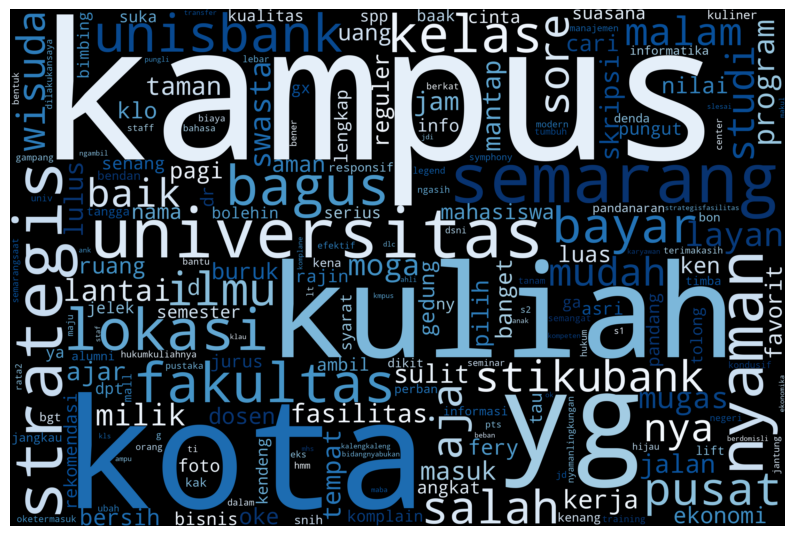

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
# netral_tweets = my_df[my_df['Label'] == 'None']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
# netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in df['text_tokens_stemmed'].fillna('')])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Positif NB

### 1. Naive Bayes

#### Menghitung Jumlah Baris Positif

In [52]:
df[df['Label NB Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,lokasi strategis d kota dosen oke moga maju foto ambil dr lantai 6 kampus,positif,positif,positif,positif,positif
1,"Salah satu universitas swasta dengan lokasi paling strategis di jantung kota Semarang (Kampus Mugas). Memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis, fakultas hukum, fakultas TI, fakultas bahasa …",salah universitas swasta lokasi strategis jantung kota semarang kampus mugas milik fakultas program studi pilih fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,positif,positif,positif,positif,positif
2,"Salah satu kampus terbaik dan legend di Kota Semarang, S1 maupun S2",salah kampus baik legend kota semarang s1 s2,positif,positif,positif,positif,positif
3,"Kampus ini memiliki fasilitas yang lengkap dan modern, seperti perpustakaan yang luas, dan ruang kelas yang nyaman\r\nLingkungan kampus sangat hijau dan asri, memberikan suasana yang nyaman untuk …",kampus milik fasilitas lengkap modern pustaka luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,positif,positif,positif,positif,positif
4,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu Hukum\r\nKuliahnya menyenangkan ,ngasih nilainya gampang 🫶🏻🫶🏻🫶🏻 …",angkat 2017 kelas reguler sore jurus ilmu hukumkuliahnya senang ngasih nilai gampang,positif,positif,positif,positif,positif


In [53]:
len(df[df['Label NB Average'] == 'positif'])

130

#### Penerapan Wordcloud

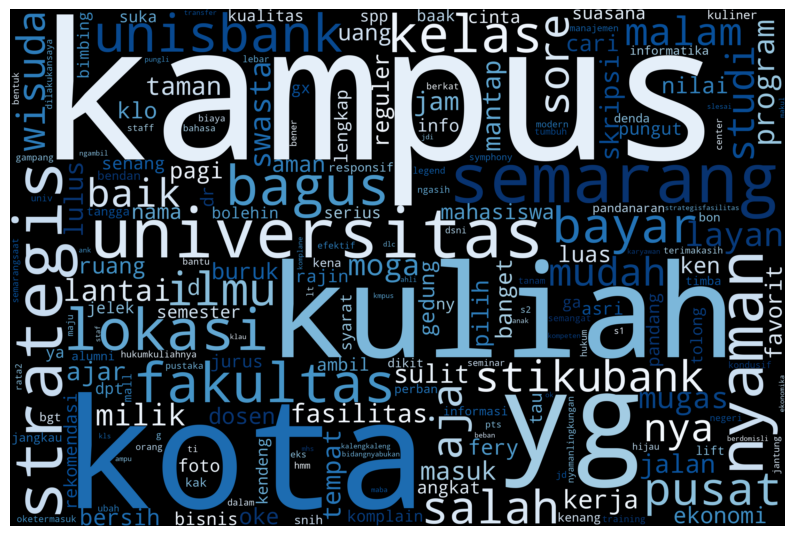

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')
    plt.show()

netral_tweets = df[df['Label NB Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Positif

In [55]:
df[df['Label SVM Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Lokasi strategis d tengah kota. Dosennya oke. semoga semakin maju. Foto diambil dr lantai 6 kampus,lokasi strategis d kota dosen oke moga maju foto ambil dr lantai 6 kampus,positif,positif,positif,positif,positif
1,"Salah satu universitas swasta dengan lokasi paling strategis di jantung kota Semarang (Kampus Mugas). Memiliki beberapa fakultas dengan program studi pilihan seperti fakultas ekonomi dan bisnis, fakultas hukum, fakultas TI, fakultas bahasa …",salah universitas swasta lokasi strategis jantung kota semarang kampus mugas milik fakultas program studi pilih fakultas ekonomi bisnis fakultas hukum fakultas ti fakultas bahasa,positif,positif,positif,positif,positif
2,"Salah satu kampus terbaik dan legend di Kota Semarang, S1 maupun S2",salah kampus baik legend kota semarang s1 s2,positif,positif,positif,positif,positif
3,"Kampus ini memiliki fasilitas yang lengkap dan modern, seperti perpustakaan yang luas, dan ruang kelas yang nyaman\r\nLingkungan kampus sangat hijau dan asri, memberikan suasana yang nyaman untuk …",kampus milik fasilitas lengkap modern pustaka luas ruang kelas nyamanlingkungan kampus hijau asri suasana nyaman,positif,positif,positif,positif,positif
4,"Angkatan 2017 kelas reguler sore ,jurusan Ilmu Hukum\r\nKuliahnya menyenangkan ,ngasih nilainya gampang 🫶🏻🫶🏻🫶🏻 …",angkat 2017 kelas reguler sore jurus ilmu hukumkuliahnya senang ngasih nilai gampang,positif,positif,positif,positif,positif


In [56]:
len(df[df['Label SVM Average'] == 'positif'])

130

#### Penerapan Wordcloud

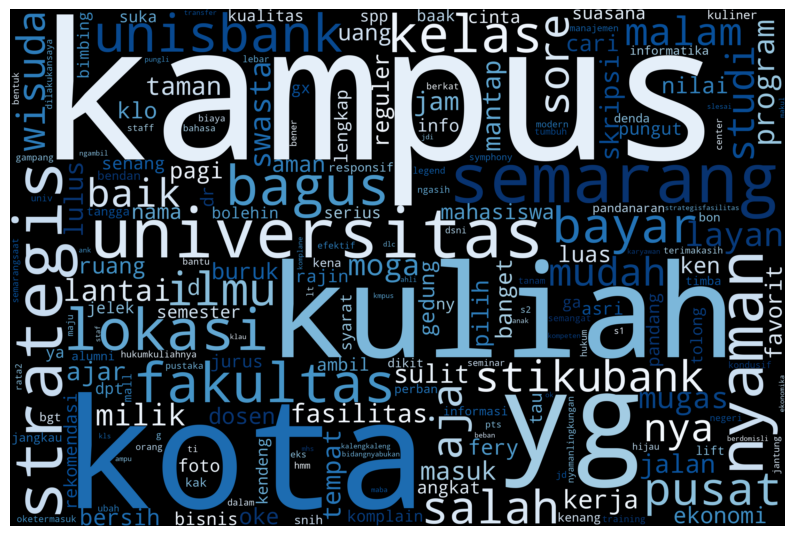

In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')


    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Negatif

### 1. Naive Bayes

#### Menghitung Jumlah Baris Negatif

In [58]:
df[df['Label NB Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average


In [59]:
len(df[df['Label NB Average'] == 'negatif'])

0

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label NB Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

ValueError: We need at least 1 word to plot a word cloud, got 0.

### 2. SVM

#### Menghitung Jumlah Baris Negatif

In [65]:
df[df['Label SVM Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
220,"Sangat mengecewakan jauh dibawah ekspektasi padahal piknik sekolah tidak ada tour guide hewan hanya sedikit tempat bilas anak terbuka apalagi soal makanan, tidak boleh bawa makanan dari luar tapi harga di dalam tidak masuk akal. Dim sum 3",kecewa bawah ekspektasi piknik sekolah tour guide hewan bilas anak buka makan bawa makan harga masuk akal dim sum 3,negatif,positif,positif,negatif,negatif
276,"Harga makanan mahal rasa gak enak gak ada asin nya ,gak boleh bawa makanan ,jangan kesini mending ke pantai cahaya aja ,pentas lumba2 nya panas bnget harga es teh cup 10rb",harga makan mahal gak enak gak asin nya gak bawa makan kesini mending pantai cahaya aja pentas lumba2 nya panas bnget harga es teh cup 10rb,negatif,positif,positif,negatif,negatif
407,Bisa dicoba sendiri.,coba,negatif,positif,positif,negatif,negatif


In [62]:
len(df[df['Label SVM Average'] == 'negatif'])

3

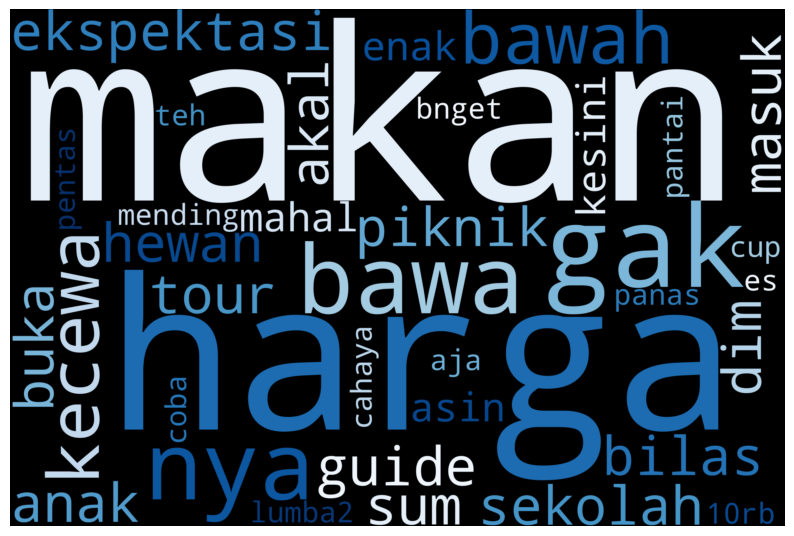

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)